-----------------------
#### variance-based anomaly detection in time series data
-----------------------

- Imagine we have a sensor in a factory that measures the `temperature` of a critical machine component every minute. 
- The machine operates under specific conditions and should maintain a relatively consistent temperature. 
- However, if something goes wrong, the temperature might fluctuate erratically.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

##### Data:
Let's simulate some data where the temperature is consistent for a while and then starts to fluctuate:

In [2]:
# Seed for reproducibility
np.random.seed(11)

In [3]:
# Generate consistent temperature data
consistent_data = np.random.normal(50, 0.5, 100)  # Mean=50, Stddev=0.5

# Generate anomalous data
anomalous_data  = np.random.normal(50, 1.5, 30)    # Higher standard deviation

In [4]:
# Concatenate the data
data = np.concatenate([consistent_data, anomalous_data])

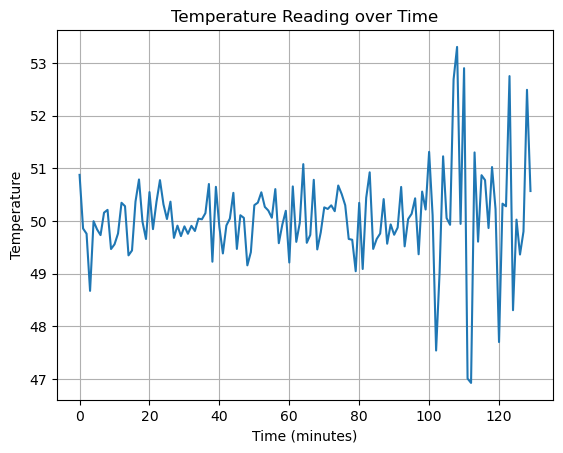

In [5]:
plt.plot(data)
plt.title('Temperature Reading over Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Temperature')
plt.grid();

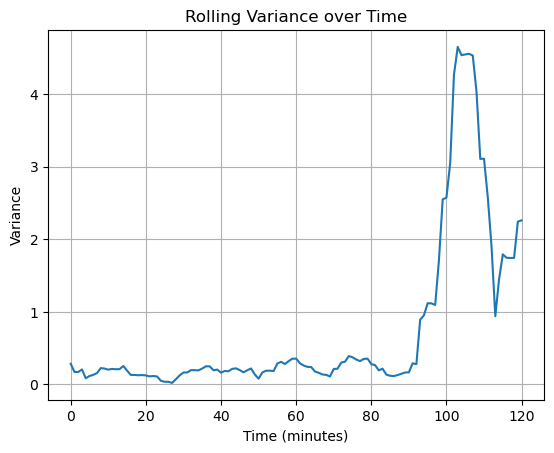

In [6]:
def compute_rolling_variance(data, window_size=10):
    """Compute the rolling variance for the data."""
    return np.array([np.var(data[i:i+window_size]) for i in range(len(data) - window_size + 1)])

window_size      = 10
rolling_variance = compute_rolling_variance(data, window_size)

plt.plot(rolling_variance)
plt.title('Rolling Variance over Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Variance')
plt.grid();

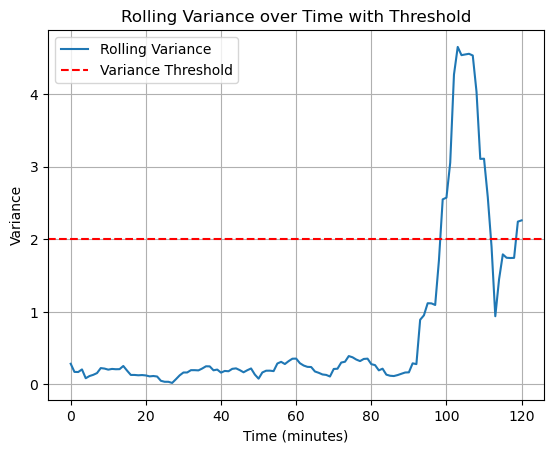

In [7]:
# Set a threshold for variance
variance_threshold = 2

plt.plot(rolling_variance, label='Rolling Variance')
plt.axhline(y=variance_threshold, color='r', linestyle='--', label='Variance Threshold')
plt.title('Rolling Variance over Time with Threshold')
plt.xlabel('Time (minutes)')
plt.ylabel('Variance')
plt.legend()
plt.grid();

In the plot, the red dashed line represents the variance threshold. Whenever the rolling variance (blue line) crosses this threshold, it indicates an anomaly. This method can provide a straightforward way to visually spot anomalies in time series data based on variance.